This is my approach to linear regression problem. 

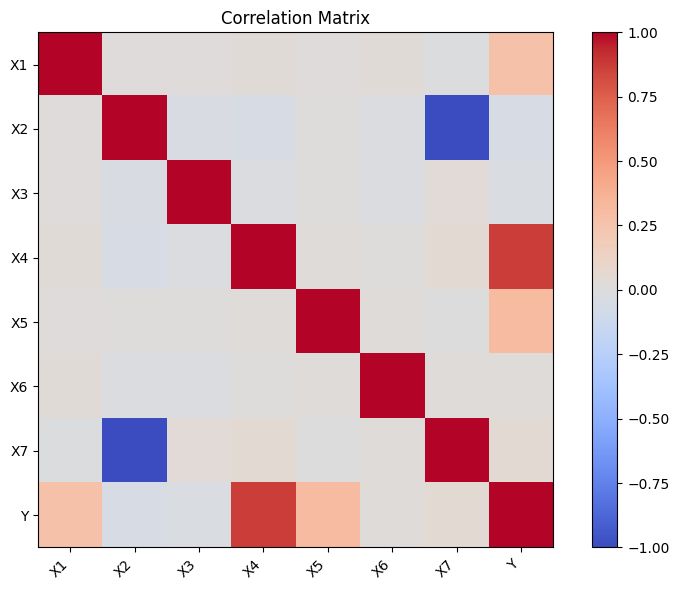

[np.float64(-0.3986655546288574), np.float64(-0.6989157631359466), np.float64(4.48790658882402), np.float64(18.11759799833194), np.float64(44.84987489574645), np.float64(-1.005004170141785), np.float64(12.397831526271894), np.float64(0.0)]


In [1]:
import numpy as np
from linear_regression import filename, LinearRegressionModel, StopCondition, RidgeRegressionFunction, Uninomial, \
    QuadraticLossFunction, Linear, LassoRegressionFunction, Zeros, Custom, Gaussian, ElasticNetworkLossFunction, gauss

model = LinearRegressionModel(filename, True)
model.set_parameters(loss_function=QuadraticLossFunction(), base_function=Linear())
model.corr()

In [2]:
# a, b = model.estimate_coef()
print(model.mean)
print(model.std)

[np.float64(-0.3986655546288574), np.float64(-0.6989157631359466), np.float64(4.48790658882402), np.float64(18.11759799833194), np.float64(44.84987489574645), np.float64(-1.005004170141785), np.float64(12.397831526271894), np.float64(0.0)]
[np.float64(5.763871679234808), np.float64(2.8534263953894072), np.float64(1.708921457646692), np.float64(12.008907546160872), np.float64(8.646856153277609), np.float64(1.4206771561950318), np.float64(5.7068527907788145), np.float64(1.0)]


In [ ]:
model.set_parameters(eta=0.01, stop=0.005, rep_count=4000, condition=StopCondition.Both)
model.set_parameters(mini_batch=True   , batch_size=64, print_c=-1)
model.linear_regression()

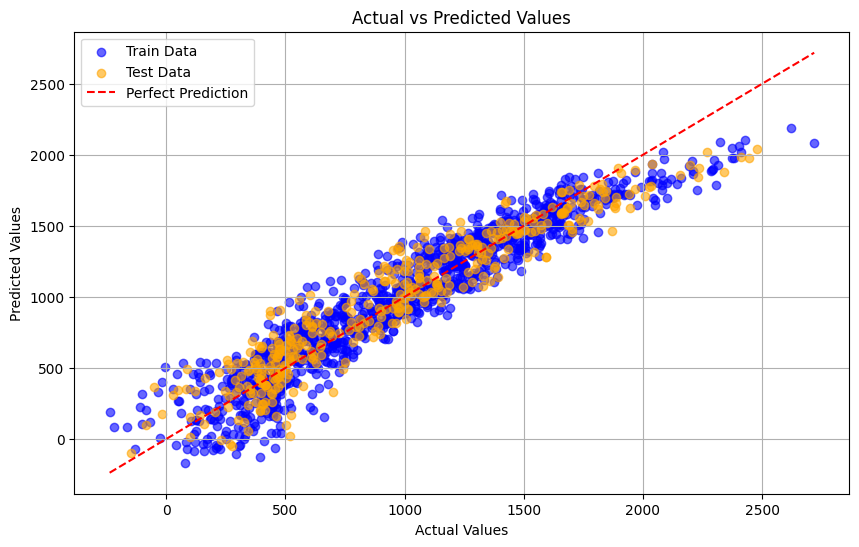

Train Set MSE: 14110.058369333292
Test Set MSE: 15334.53118456432


In [7]:
model.print_results()
model.results()

In [6]:
model.set_parameters(base_function=Linear())
model.solve_analytically(0.1)
print(model.theta)

[-18.68914841  23.27826543 -83.02219842  -8.58947778  37.61517912
  17.52176821  -1.97748861 -39.53623572]


In [1]:
from random import randrange
i = randrange(0, len(model.test) - 1, 1)
p = model.prediction([1, *[model.test[i][j] for j in range(len(model.test[0]) - 1)]])
a = model.test[i][-1]
np.set_printoptions(precision=2)
print(f"prediction: {"%0.2f" %  p}. actual: {"%0.2f" %  a}, error = {"%0.2f" % (abs(p - a) / a * 100)}%")

NameError: name 'model' is not defined

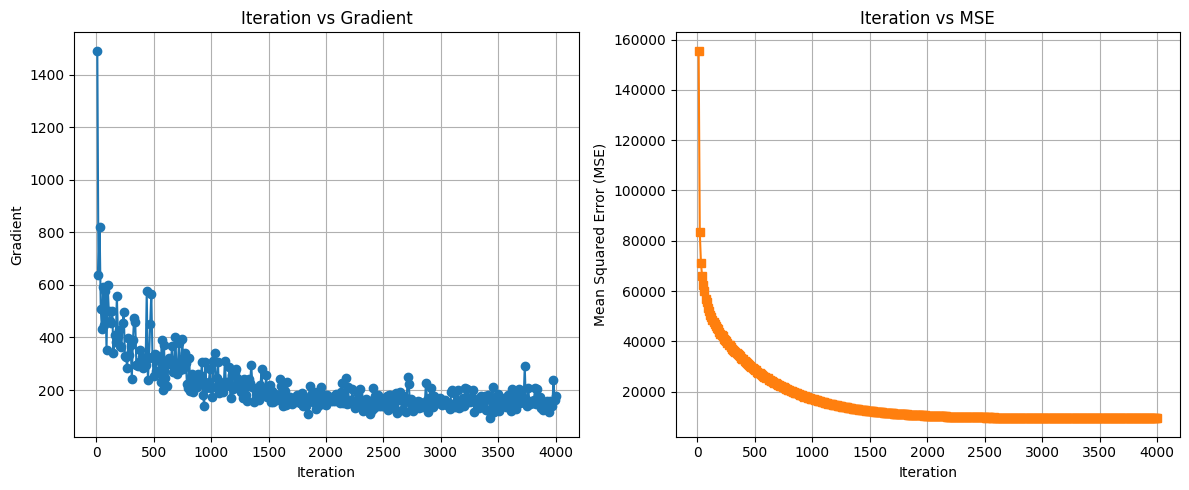

In [9]:
model.plot_learning_curves()

In [ ]:
for l in [0.000001, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 1000, 100000]:
    print(f"\lambda = {l}")
    model.set_parameters(base_function=Linear())
    model.solve_analytically(l)
    model.results()

In [92]:
batch_size = 512
model.set_parameters(base_function=Linear())
model.set_parameters(eta=0.01, stop=0.005, rep_count=1000, condition=StopCondition.Both)
model.set_parameters(mini_batch=True   , batch_size=batch_size, print_c=10)
model.linear_regression()

10: Gradient: 999.2227267179834, MSE: 521516.67835781316
20: Gradient: 933.983264754237, MSE: 427754.36464422743
30: Gradient: 837.0539533712231, MSE: 351710.2960619597
40: Gradient: 741.1800028512793, MSE: 290340.9196986366
50: Gradient: 691.9709358632249, MSE: 239543.89251571317
60: Gradient: 654.8173545812464, MSE: 198456.14163105257
70: Gradient: 542.6577532045046, MSE: 164893.57055203986
80: Gradient: 505.17715833130615, MSE: 136769.56375917274
90: Gradient: 448.3443123562621, MSE: 114037.98154817791
100: Gradient: 413.4737860587617, MSE: 95740.06690399602
110: Gradient: 378.2685645809277, MSE: 81072.52936486121
120: Gradient: 336.73932218605034, MSE: 68767.3999231955
130: Gradient: 310.4164323692024, MSE: 58959.2322232164
140: Gradient: 263.16588900684934, MSE: 50871.91609778267
150: Gradient: 244.02224497348266, MSE: 44159.56705616182
160: Gradient: 224.6407836586605, MSE: 38895.08391166347
170: Gradient: 211.91985243534828, MSE: 34466.08375159134
180: Gradient: 173.896018264312

[np.float64(979.5060969468045),
 np.float64(132.01845054400283),
 np.float64(-3.444419460135415),
 np.float64(-11.241409160974234),
 np.float64(458.9058181383815),
 np.float64(159.50086361810648),
 np.float64(5.159141902320642),
 np.float64(3.444419460135415)]

In [37]:
res = []

In [43]:
import matplotlib.pyplot as plt
model.set_parameters(print_c=-1)
frac = [0.01, 0.02, 0.03, 0.125, 0.625, 1]
i = 0
s = []
for f in frac:
    
    model.split_data(0.6, 0.2, normalise=True)
    model.set_parameters(split=True, fraction=f)
    model.linear_regression()
    s.append(model.MSEs())
res.append(s)


    

In [44]:
print(res)

[[[np.float64(22349.605807900523), np.float64(19878.203427493467)], [np.float64(20352.96892987269), np.float64(21271.1972891535)], [np.float64(19118.56236155439), np.float64(17368.272108028097)], [np.float64(15994.451766942346), np.float64(14494.540835279244)], [np.float64(14504.244107087665), np.float64(14038.116470126259)], [np.float64(14455.355767861254), np.float64(14003.423343834247)]], [[np.float64(78450.38854091003), np.float64(82859.61728230299)], [np.float64(30358.701162328543), np.float64(28198.46679356944)], [np.float64(19823.77435805915), np.float64(21643.982588315735)], [np.float64(14632.29512141354), np.float64(13895.434809695349)], [np.float64(14512.539830377596), np.float64(14220.485178241568)], [np.float64(14455.35576786125), np.float64(14003.423343834243)]], [[np.float64(225072.12688749845), np.float64(221408.47395505948)], [np.float64(61445.66830737385), np.float64(55976.3922397666)], [np.float64(22762.01888005964), np.float64(24196.47436750153)], [np.float64(15079.0

In [46]:
def average_result(r):
    num_items = len(r[0])  # how many pairs in each run
    mean_result = []

    for i in range(num_items):
        first_vals = [run[i][0] for run in r]
        second_vals = [run[i][1] for run in r]
        mean_pair = [sum(first_vals) / len(first_vals), sum(second_vals) / len(second_vals)]
        mean_result.append(mean_pair)

    return mean_result

res = average_result(res)

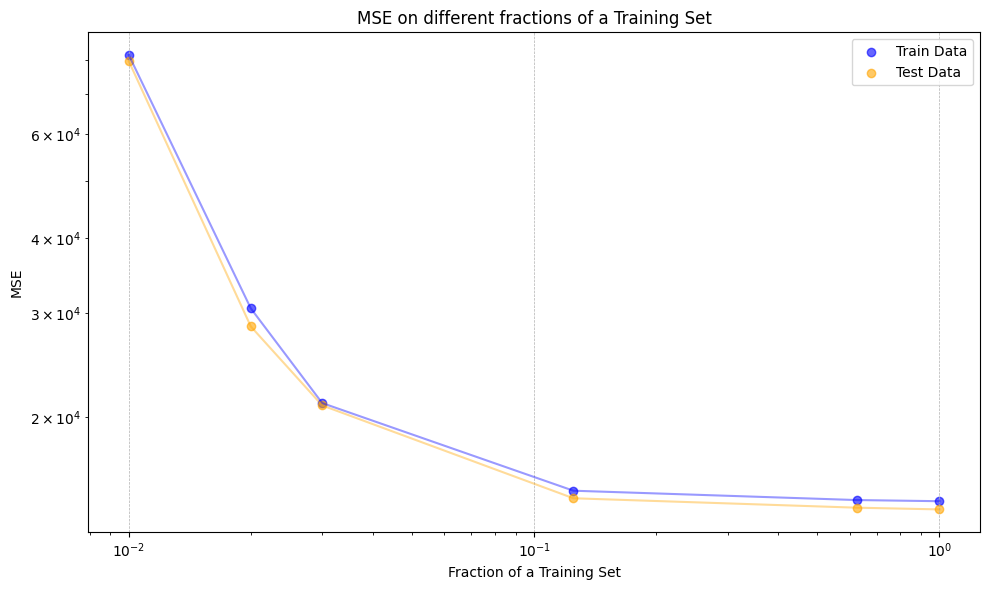

In [48]:
def plot_reg_coef():
    # Unpack the data
    coef = frac
    lasso = [item[0] for item in res]
    ridge = [item[1] for item in res]

    plt.figure(figsize=(10, 6))

    # Sort by coef to make line connections clean
    sorted_data = sorted(zip(coef, lasso, ridge), key=lambda x: x[0])
    sorted_coef, sorted_lasso, sorted_ridge = zip(*sorted_data)

    # Scatter plots
    plt.scatter(sorted_coef, sorted_lasso, alpha=0.6, label='Train Data', color='blue')
    plt.scatter(sorted_coef, sorted_ridge, alpha=0.6, label='Test Data', color='orange')

    # Line plots to connect the points
    plt.plot(sorted_coef, sorted_lasso, color='blue', alpha=0.4)
    plt.plot(sorted_coef, sorted_ridge, color='orange', alpha=0.4)

    plt.xlabel('Fraction of a Training Set')
    plt.ylabel('MSE')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('MSE on different fractions of a Training Set')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.legend()
    plt.show()
plot_reg_coef()

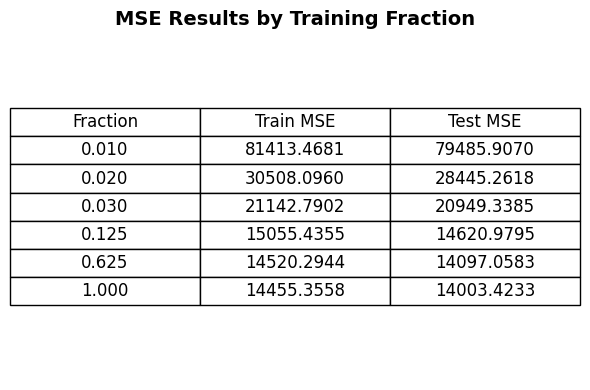

In [49]:
table_data = [[f"{f:.3f}", f"{train:.4f}", f"{test:.4f}"] for f, (train, test) in zip(frac, res)]

# Column headers
col_labels = ["Fraction", "Train MSE", "Test MSE"]

# Plot table
fig, ax = plt.subplots(figsize=(6, len(frac) * 0.5 + 1))
ax.axis("off")  # Hide axes

table = ax.table(cellText=table_data, colLabels=col_labels, cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust size of cells

plt.title("MSE Results by Training Fraction", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

In [3]:

diff_2 = lambda x: [*[x[i] for i in range(8)],
                      *[x[i] * x[j] for i in range(1, 8) for j in range(i, 8)]]
diff_3 = lambda x: [*[x[i] for i in range(8)],
                      *[x[i] * x[j] for i in range(1, 8) for j in range(i, 8)],
                      *[x[i] * x[j] * x[k] for i in range(1, 8) for j in range(i, 8) for k in range(j, 8)]]
diff_4 = lambda x: [1, x[1], x[4], x[5], x[7], x[3], x[6],
    x[1]*x[1], x[4]*x[4], x[5]*x[5], x[1] * x[4], x[1] * x[5], x[4] * x[5], x[7]*x[7], 
    
]

S = [0.01, 0.5]
diff_5 = lambda x: [ *[x[i] for i in range(8)],
                      *[x[i] * x[j] for i in range(1, 8) for j in range(i, 8)],
                    gauss(x[1], 0.01), gauss(x[4], 0.01), gauss(x[5], 0.01), gauss(x[3], 0.01), gauss(x[6], 0.01), gauss(x[7], 0.01),
        gauss(x[1], 0.5), gauss(x[4], 0.5), gauss(x[5], 0.5), gauss(x[3], 0.5), gauss(x[6], 0.5),
                    gauss(x[7], 0.5)]
func = Custom()
func.setdiff(diff_5)
model.set_parameters(eta=0.01)
model.set_parameters(base_function=func, loss_function=QuadraticLossFunction())
model.set_parameters(print_c = 200, rep_count=5000, mini_batch=True, batch_size=32)

In [4]:
model.linear_regression()

200: Gradient: 197.94748383680434, MSE: 16690.388408833547
400: Gradient: 176.87412594879177, MSE: 7918.375084600254
600: Gradient: 97.0072182989233, MSE: 5667.093330886112
800: Gradient: 87.8539406903745, MSE: 4664.9137461609735
1000: Gradient: 81.30638058870898, MSE: 4019.9043572687688
1200: Gradient: 73.10955902802897, MSE: 3581.468297317812
1400: Gradient: 88.9858195586756, MSE: 3244.9659738934665
1600: Gradient: 91.95888323081806, MSE: 2967.8112293910435
1800: Gradient: 145.54348362204198, MSE: 2745.2955205115077
2000: Gradient: 99.60969185745027, MSE: 2557.5303457802847
2200: Gradient: 62.73634844883336, MSE: 2401.828421911245
2400: Gradient: 61.07058610803757, MSE: 2266.1473473534293
2600: Gradient: 83.40716891508598, MSE: 2141.9855586796707
2800: Gradient: 52.61893345066834, MSE: 2050.0624616973582
3000: Gradient: 72.88803322807416, MSE: 1954.3604567827595
3200: Gradient: 53.585880470865, MSE: 1872.8780726352127
3400: Gradient: 54.06496373651075, MSE: 1796.1537613789749
3600: G

[np.float64(549.353010359104),
 np.float64(136.79659736713543),
 np.float64(-9.111106824707873),
 np.float64(-6.652158843178134),
 np.float64(459.2169957261282),
 np.float64(155.593171272224),
 np.float64(0.4535813189526869),
 np.float64(9.111106824707838),
 np.float64(9.062193386731069),
 np.float64(-1.1492566169959693),
 np.float64(89.03874682232066),
 np.float64(-3.111695878993598),
 np.float64(-0.4170024952407423),
 np.float64(0.5949575398736565),
 np.float64(1.1492566169959688),
 np.float64(7.0610049234713195),
 np.float64(0.9970149631492508),
 np.float64(0.9832014507509935),
 np.float64(-2.2702909586763673),
 np.float64(0.6132611525426515),
 np.float64(-7.06100492347133),
 np.float64(34.72270372590104),
 np.float64(1.5930467754741793),
 np.float64(-0.6963393103321251),
 np.float64(0.5878801668802283),
 np.float64(-0.9970149631492574),
 np.float64(141.33766536301584),
 np.float64(103.44053180776945),
 np.float64(-0.6720925574289844),
 np.float64(-0.9832014507510162),
 np.float64(1

In [6]:
theta = model.theta
theta = [round(float(t), 5)
 for t in theta]
print(theta)

[549.35301, 136.7966, -9.11111, -6.65216, 459.217, 155.59317, 0.45358, 9.11111, 9.06219, -1.14926, 89.03875, -3.1117, -0.417, 0.59496, 1.14926, 7.061, 0.99701, 0.9832, -2.27029, 0.61326, -7.061, 34.7227, 1.59305, -0.69634, 0.58788, -0.99701, 141.33767, 103.44053, -0.67209, -0.9832, 19.95783, 0.0867, 2.27029, 15.96881, -0.61326, 7.061, -0.0, 3.68088, -1.58336, 0.0, -37.84482, -0.0, 68.94492, 385.38169, 52.33111, 90.82989, 64.4988, 60.28962]


In [49]:
theta = model.theta
theta = [float(t) for t in theta]
args = ["1", *[f"x[{i}]"  for i in range(1, 8)], *[f"x[{i}]x[{j}]" for i in range(1, 8) for j in range(i, 8)]]
resfunc = [(theta[i], args[i]) for i in range(len(args))]
resfunc.sort(key=lambda x: -x[0]*x[0])
print(len(theta))
print(len(args))

for entry in resfunc:
    print(f"{entry[0]:.2f} {entry[1]}")

36
36
959.72 1
458.77 x[4]
159.75 x[5]
133.77 x[1]
106.43 x[4]x[5]
86.93 x[1]x[3]
34.37 x[4]x[4]
-16.01 x[1]x[1]
5.99 x[3]x[3]
5.71 x[7]
-5.71 x[2]
-3.04 x[3]
-2.69 x[1]x[6]
-2.37 x[1]x[5]
2.24 x[5]x[7]
-2.24 x[2]x[5]
-2.11 x[6]x[6]
1.79 x[4]x[6]
1.70 x[6]
1.67 x[5]x[6]
1.51 x[2]x[6]
-1.51 x[6]x[7]
1.40 x[5]x[5]
-0.96 x[3]x[5]
0.82 x[4]x[7]
-0.82 x[2]x[4]
-0.73 x[3]x[4]
-0.65 x[2]x[3]
0.65 x[3]x[7]
-0.58 x[1]x[2]
0.58 x[1]x[7]
-0.52 x[3]x[6]
0.39 x[1]x[4]
-0.09 x[2]x[2]
0.09 x[2]x[7]
-0.09 x[7]x[7]


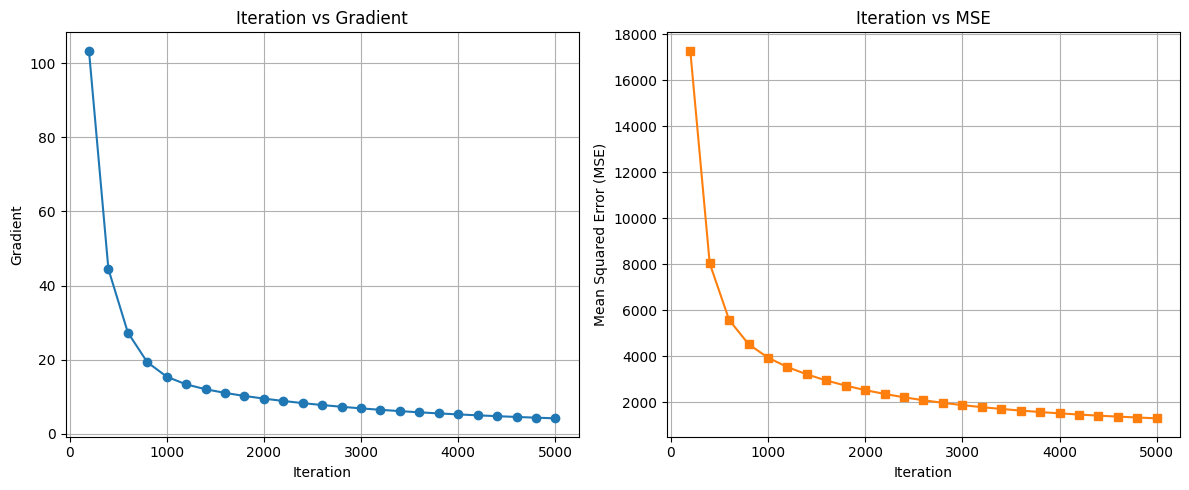

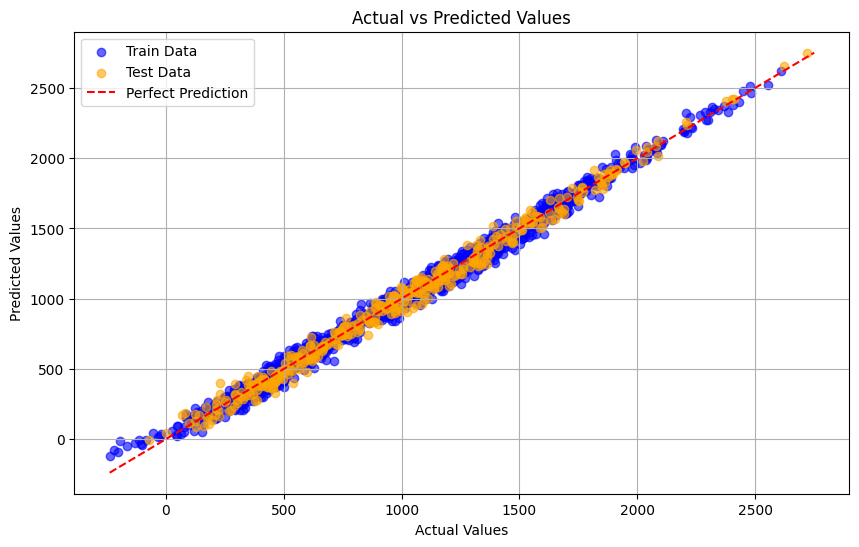

Train Set MSE: 1291.5501744233463
Test Set MSE: 1294.7938498232659


In [140]:
model.plot_learning_curves()
model.print_results()
model.results()